In [115]:
import numpy as np


PX = r"/Users/salimameziane/Downloads/dataset/x_train.csv"
PY = r"/Users/salimameziane/Downloads/dataset/y_train.csv"
PXt = r"/Users/salimameziane/Downloads/dataset/x_test.csv"




ncols = open(PX, encoding="utf-8").readline().count(",") + 1  
ncols2 = open(PY, encoding="utf-8").readline().count(",") + 1

X  = np.genfromtxt(PX,  delimiter=",", skip_header=1, usecols=range(1, ncols))
y  = np.genfromtxt(PY,  delimiter=",", skip_header=1, usecols=range(1, ncols2))
Xt = np.genfromtxt(PXt, delimiter=",", skip_header=1, usecols=range(1, ncols))


y = y.ravel()                      
tx = X                            

tx = np.c_[np.ones(tx.shape[0]), tx]  
txt = np.c_[np.ones(Xt.shape[0]), Xt] 

print(tx.shape, y.shape, txt.shape)


(328135, 322) (328135,) (109379, 322)


In [116]:

X_no_bias = tx[:, 1:]

#  Missing values 
n_missing = np.isnan(X_no_bias).sum()
print(f"Total missing values in X_train: {n_missing}")
if n_missing > 0:
    missing_per_col = np.isnan(X_no_bias).sum(axis=0)
    print("Missing values per feature (first 10 shown):")
    print(missing_per_col[:10])

# Basic statistic
mean_vec = np.nanmean(X_no_bias, axis=0)
std_vec  = np.nanstd(X_no_bias, axis=0)
min_vec  = np.nanmin(X_no_bias, axis=0)
max_vec  = np.nanmax(X_no_bias, axis=0)

print("-" * 60)
print("Feature summary (first 10 columns):")
for i in range(min(10, X_no_bias.shape[1])):
    print(f"Feature {i+1:>2}: mean={mean_vec[i]:>10.4f}, std={std_vec[i]:>10.4f}, "
          f"min={min_vec[i]:>10.4f}, max={max_vec[i]:>10.4f}")
print("-" * 60)

#  Label distribution -
unique, counts = np.unique(y, return_counts=True)
print("Label distribution:")
for val, cnt in zip(unique, counts):
    print(f"  Value {val}: {cnt} samples ({cnt / len(y) * 100:.2f}%)")

#Quick sanity check 
print("-" * 60)
print("NaN check:", np.isnan(y).any(), np.isnan(X_no_bias).any())

Total missing values in X_train: 47175779
Missing values per feature (first 10 shown):
[     0      0      0      0      0      0      0      0      0 139415]
------------------------------------------------------------
Feature summary (first 10 columns):
Feature  1: mean=   29.9737, std=   16.0318, min=    1.0000, max=   72.0000
Feature  2: mean=    6.3607, std=    3.4873, min=    1.0000, max=   12.0000
Feature  3: mean=6563638.1981, std=3489242.3515, min=1012016.0000, max=12312015.0000
Feature  4: mean=    6.4167, std=    3.4927, min=    1.0000, max=   12.0000
Feature  5: mean=   14.4962, std=    8.3345, min=    1.0000, max=   31.0000
Feature  6: mean= 2015.0248, std=    0.1554, min= 2015.0000, max= 2016.0000
Feature  7: mean= 1115.0149, std=   35.7217, min= 1100.0000, max= 1200.0000
Feature  8: mean=2015005197.3278, std= 4118.4691, min=2015000001.0000, max=2015023235.0000
Feature  9: mean=2015005197.3278, std= 4118.4691, min=2015000001.0000, max=2015023235.0000
Feature 10: mean=    

In [117]:
X_no_bias = tx[:, 1:]  

# count NaNs per column
nan_per_col = np.isnan(X_no_bias).sum(axis=0)

# total NaNs
total_nan = nan_per_col.sum()
print(f"Total missing values in X_train: {total_nan}")

# display counts
print("Missing values per column:")
for i, cnt in enumerate(nan_per_col):
    print(f"  Column {i+1}: {cnt}")


Total missing values in X_train: 47175779
Missing values per column:
  Column 1: 0
  Column 2: 0
  Column 3: 0
  Column 4: 0
  Column 5: 0
  Column 6: 0
  Column 7: 0
  Column 8: 0
  Column 9: 0
  Column 10: 139415
  Column 11: 139415
  Column 12: 328103
  Column 13: 139416
  Column 14: 139415
  Column 15: 328103
  Column 16: 139433
  Column 17: 139524
  Column 18: 139525
  Column 19: 188720
  Column 20: 188720
  Column 21: 188721
  Column 22: 188720
  Column 23: 327334
  Column 24: 188719
  Column 25: 189287
  Column 26: 192544
  Column 27: 2
  Column 28: 1
  Column 29: 0
  Column 30: 159860
  Column 31: 0
  Column 32: 0
  Column 33: 1
  Column 34: 1
  Column 35: 1
  Column 36: 196334
  Column 37: 0
  Column 38: 43801
  Column 39: 43801
  Column 40: 0
  Column 41: 0
  Column 42: 284153
  Column 43: 1
  Column 44: 0
  Column 45: 0
  Column 46: 1
  Column 47: 0
  Column 48: 0
  Column 49: 5
  Column 50: 285915
  Column 51: 0
  Column 52: 0
  Column 53: 0
  Column 54: 0
  Column 55: 1394

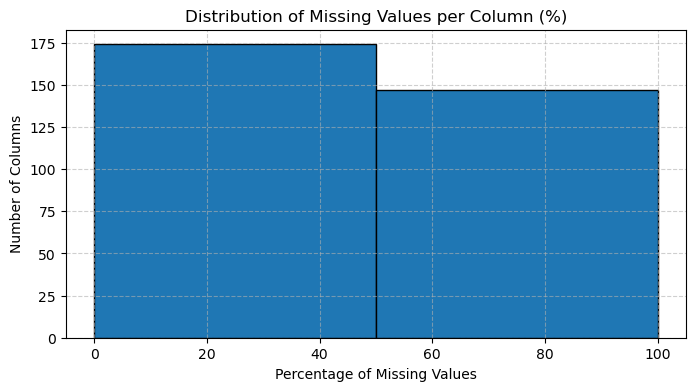

<Figure size 640x480 with 0 Axes>

In [118]:
import matplotlib.pyplot as plt
import numpy as np

n_rows = X_no_bias.shape[0]
perc_missing = nan_per_col / n_rows * 100
#print(np.round(perc_missing, 2))

# Plot histogram
plt.figure(figsize=(8, 4))
plt.hist(perc_missing, bins=2, edgecolor='black')
plt.title('Distribution of Missing Values per Column (%)')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Number of Columns')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

plt.savefig('missing_values_hist.png', dpi=300)


Final feature count: 95
tx/txt shapes: (328135, 96) (109379, 96)


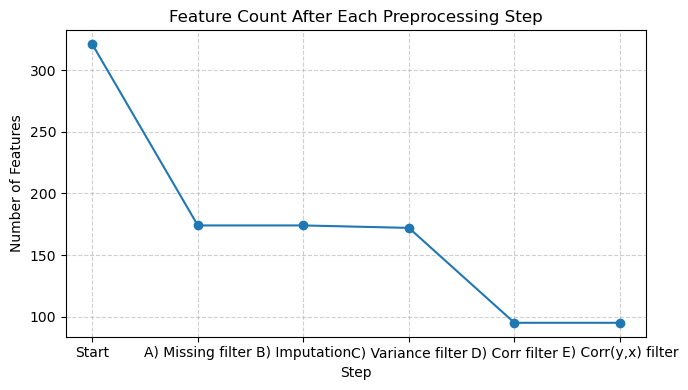

In [119]:
import numpy as np
import matplotlib.pyplot as plt


MISSING_THRESH = 50.0     
MAX_FEATS = 200           
VAR_THRESH = 1e-10        
CORR_THRESH = 0.5         
MIN_CORR_Y = 0.3          
TOPK_YCORR = 100          



b_tr  = tx[:, :1]
X_tr  = tx[:, 1:]
b_te  = txt[:, :1]
X_te  = txt[:, 1:]

steps = []
counts = [X_tr.shape[1]]

#  A) drop high-missing features 
miss_pct = np.isnan(X_tr).mean(axis=0) * 100.0
var_tr0  = np.nanvar(X_tr, axis=0)

keep = miss_pct < MISSING_THRESH
idx_keep = np.where(keep)[0]

if MAX_FEATS is not None:
    order = np.lexsort((-var_tr0[idx_keep], miss_pct[idx_keep]))
    idx_keep = idx_keep[order[:min(MAX_FEATS, len(idx_keep))]]

keep_mask = np.zeros(X_tr.shape[1], dtype=bool)
keep_mask[idx_keep] = True

X_tr = X_tr[:, keep_mask]
X_te = X_te[:, keep_mask]

steps.append("A) Missing filter")
counts.append(X_tr.shape[1])

#  B) impute missing values 
col_means = np.nanmean(X_tr, axis=0)
inds = np.where(np.isnan(X_tr))
if inds[0].size:
    X_tr[inds] = np.take(col_means, inds[1])
inds_t = np.where(np.isnan(X_te))
if inds_t[0].size:
    X_te[inds_t] = np.take(col_means, inds_t[1])

steps.append("B) Imputation")
counts.append(X_tr.shape[1])

# C) drop near-constant features 
var_tr = np.var(X_tr, axis=0)
keep_var = var_tr > VAR_THRESH
X_tr = X_tr[:, keep_var]
X_te = X_te[:, keep_var]

steps.append("C) Variance filter")
counts.append(X_tr.shape[1])

# D) remove highly correlated features 
Z = (X_tr - X_tr.mean(axis=0)) / (X_tr.std(axis=0) + 1e-12)
C = np.corrcoef(Z, rowvar=False)
p = C.shape[0]
keep_corr = np.ones(p, dtype=bool)
for i in range(p):
    if keep_corr[i]:
        keep_corr[(i+1):] &= np.abs(C[i, (i+1):]) <= CORR_THRESH

X_tr = X_tr[:, keep_corr]
X_te = X_te[:, keep_corr]

steps.append("D) Corr filter")
counts.append(X_tr.shape[1])

# E) keep only features correlated with y 
y_centered = y - y.mean()
stdy = y_centered.std()
stdx = X_tr.std(axis=0)
stdx[stdx == 0] = 1.0
corr_y = np.abs((y_centered @ (X_tr - X_tr.mean(axis=0))) / (len(y) * stdx * stdy))

if TOPK_YCORR is not None:
    k = min(TOPK_YCORR, X_tr.shape[1])
    idx = np.argsort(-corr_y)[:k]
    keep_y = np.zeros_like(corr_y, dtype=bool)
    keep_y[idx] = True
else:
    keep_y = corr_y > MIN_CORR_Y

if not np.any(keep_y):
    keep_y[np.argmax(corr_y)] = True

X_tr = X_tr[:, keep_y]
X_te = X_te[:, keep_y]

steps.append("E) Corr(y,x) filter")
counts.append(X_tr.shape[1])

# F) standardize 
mu = X_tr.mean(axis=0)
sd = X_tr.std(axis=0)
sd[sd == 0] = 1.0
X_tr = (X_tr - mu) / sd
X_te = (X_te - mu) / sd

# reattach bias
tx  = np.c_[b_tr, X_tr]
txt = np.c_[b_te, X_te]

# optional 0/1 labels
y01 = (y > 0).astype(np.int8)

print(f"Final feature count: {tx.shape[1]-1}")
print("tx/txt shapes:", tx.shape, txt.shape)

# PLOT 
plt.figure(figsize=(7,4))
plt.plot(['Start'] + steps, counts, marker='o')
plt.title('Feature Count After Each Preprocessing Step')
plt.xlabel('Step')
plt.ylabel('Number of Features')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('feature_reduction_steps.png', dpi=300)
plt.show()


In [125]:
import numpy as np


# 1. Mean Squared Error 


def compute_mse(y, tx, w):
    """Compute the Mean Squared Error."""
    e = y - tx @ w
    return (e @ e) / (2 * len(y))


# 2. Linear Regression using Gradient Descent


def mean_squared_error_gd(y, tx, initial_w, max_iters, gamma):
    """Linear regression using gradient descent."""
    w = initial_w.copy()
    for _ in range(max_iters):
        grad = -(tx.T @ (y - tx @ w)) / len(y)
        w -= gamma * grad
    loss = compute_mse(y, tx, w)
    return w, loss


# 3. Linear Regression using Stochastic Gradient Descent


def batch_iter(y, tx, batch_size=1, num_batches=1, seed=1):
    """Yield mini-batches of size 1 (SGD)."""
    np.random.seed(seed)
    N = len(y)
    indices = np.random.permutation(N)
    for i in range(0, N, batch_size):
        idx = indices[i:i + batch_size]
        yield y[idx], tx[idx]

def mean_squared_error_sgd(y, tx, initial_w, max_iters, gamma):
    """Linear regression using stochastic gradient descent (batch size 1)."""
    w = initial_w.copy()
    for _ in range(max_iters):
        for y_b, tx_b in batch_iter(y, tx, batch_size=1, num_batches=1):
            grad = -(tx_b.T @ (y_b - tx_b @ w)) / len(y_b)
            w -= gamma * grad
    loss = compute_mse(y, tx, w)
    return w, loss


# 4. Least Squares Regression (Normal Equation)


def least_squares(y, tx):
    """Least squares regression using normal equations."""
    w = np.linalg.solve(tx.T @ tx, tx.T @ y)
    loss = compute_mse(y, tx, w)
    return w, loss


# 5. Ridge Regression


def ridge_regression(y, tx, lambda_):
    """Ridge regression using normal equations."""
    N, D = tx.shape
    I = np.eye(D)
    # bias term not regularized
    I[0, 0] = 0
    A = tx.T @ tx + 2 * N * lambda_ * I
    b = tx.T @ y
    w = np.linalg.solve(A, b)
    loss = compute_mse(y, tx, w)
    return w, loss


# 6. Logistic Regression (Gradient Descent)


def sigmoid(t):
    """Sigmoid function."""
    return 1 / (1 + np.exp(-t))

def compute_logistic_loss(y, tx, w):
    
    """Negative log-likelihood loss (without regularization)."""
    y_ = (y+1)/2
    pred = sigmoid(tx @ w)
    return -np.mean(y_ * np.log(pred + 1e-15) + (1 - y_) * np.log(1 - pred + 1e-15))

def compute_logistic_grad(y, tx, w):
    """Gradient of logistic loss."""
    pred = sigmoid(tx @ w)
    return tx.T @ ((pred - y)/2) / len(y)

def logistic_regression(y, tx, initial_w, max_iters, gamma):
    """Logistic regression using gradient descent."""
    w = initial_w.copy()
    for _ in range(max_iters):
        grad = compute_logistic_grad(y, tx, w)
        w -= gamma * grad
    loss = compute_logistic_loss(y, tx, w)
    return w, loss


# 7. Regularized Logistic Regression


def reg_logistic_regression(y, tx, lambda_, initial_w, max_iters, gamma):
    """Regularized logistic regression using gradient descent."""
    w = initial_w.copy()
    for _ in range(max_iters):
        grad = compute_logistic_grad(y, tx, w) + 2 * lambda_ * w
        grad[0] -= 2 * lambda_ * w[0]  # don't regularize bias
        w -= gamma * grad
    loss = compute_logistic_loss(y, tx, w)  # exclude penalty term
    return w, loss


In [ ]:


# --- metrics ---
def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)

def f1_score_pm1(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == -1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == -1))
    if tp == 0:
        return 0.0
    precision = tp / (tp + fp) if (tp + fp) else 0.0
    recall = tp / (tp + fn) if (tp + fn) else 0.0
    return 2 * precision * recall / (precision + recall) if (precision + recall) else 0.0


# --- folds ---
def build_k_indices(N, k=5, seed=42):
    rng = np.random.RandomState(seed)
    idx = np.arange(N)
    rng.shuffle(idx)
    return np.array_split(idx, k)


# --- threshold tuning ---
def tune_threshold(model_func, params, tx, y, folds, score_func=f1_score_pm1):
    """Tune classification threshold with cross-validation."""
    ths, f1s, accs = [], [], []
    for i in range(len(folds)):
        te = folds[i]
        tr = np.concatenate([folds[j] for j in range(len(folds)) if j != i])
        Xtr, ytr = tx[tr], y[tr]
        Xte, yte = tx[te], y[te]

        w, _ = model_func(ytr, Xtr, **params)
        s_val = Xte @ w
        grid = np.percentile(s_val, np.linspace(1, 99, 99))

        best_t, best_f1, best_acc = 0.0, -1.0, 0.0
        for t in grid:
            yhat = np.where(s_val >= t, 1, -1)
            f1 = score_func(yte, yhat)
            if f1 > best_f1:
                best_f1, best_t = f1, t
                best_acc = accuracy_score(yte, yhat)
        ths.append(best_t)
        f1s.append(best_f1)
        accs.append(best_acc)
    return float(np.median(ths)), np.mean(f1s), np.mean(accs)


# --- generic parameter tuner ---
def tune_param(model_func, tx, y, folds, param_name, param_values, extra_params=None):
    """Search best λ or γ using CV based on F1."""
    if extra_params is None:
        extra_params = {}
    best_param, best_f1 = None, -1
    for val in param_values:
        params = extra_params.copy()
        params[param_name] = val
        thr, f1, acc = tune_threshold(model_func, params, tx, y, folds)
        print(f"  {param_name}={val:.1e} → CV F1={f1:.4f}, CV Acc={acc:.4f}, Thr={thr:.4f}")
        if f1 > best_f1:
            best_param, best_f1 = val, f1
    return best_param, best_f1


# --- create submission ---
def create_csv_submission(ids, y_pred, filename):
    with open(filename, "w", encoding="utf-8") as f:
        f.write("Id,Prediction\n")
        for i, yv in zip(ids, y_pred):
            f.write(f"{int(i)},{int(yv)}\n")
    print(filename, "saved.")


# === folds and ids ===
folds = build_k_indices(len(y), k=5, seed=123)
ids_test = np.genfromtxt(PXt, delimiter=",", skip_header=1, usecols=(0,), dtype=int)



#  Least Squares

print("\n[Least Squares]")
thr_ls, mean_f1_ls, mean_acc_ls = tune_threshold(least_squares, {}, tx, y, folds)
print(f"[Least Squares] Thr={thr_ls:.4f}, CV F1={mean_f1_ls:.4f}, CV Acc={mean_acc_ls:.4f}")

w_ls, _ = least_squares(y, tx)
y_train_pred = np.where(tx @ w_ls >= thr_ls, 1, -1)
train_acc = accuracy_score(y, y_train_pred)
train_f1 = f1_score_pm1(y, y_train_pred)
print(f"[Least Squares] Train Acc={train_acc:.4f}, Train F1={train_f1:.4f}")
y_pred_ls = np.where(txt @ w_ls >= thr_ls, 1, -1)
create_csv_submission(ids_test, y_pred_ls, "submission_least_squares_f1.csv")



# Ridge Regression – tune λ automatically

lambda_values = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
print("\n[Ridge Regression] λ tuning:")
best_lambda_ridge, _ = tune_param(ridge_regression, tx, y, folds, "lambda_", lambda_values)

thr_ridge, mean_f1_ridge, mean_acc_ridge = tune_threshold(
    ridge_regression, {"lambda_": best_lambda_ridge}, tx, y, folds
)
print(f"[Ridge] Best λ={best_lambda_ridge:.1e}, Thr={thr_ridge:.4f}, CV F1={mean_f1_ridge:.4f}, CV Acc={mean_acc_ridge:.4f}")

w_ridge, _ = ridge_regression(y, tx, best_lambda_ridge)
y_train_pred = np.where(tx @ w_ridge >= thr_ridge, 1, -1)
train_acc = accuracy_score(y, y_train_pred)
train_f1 = f1_score_pm1(y, y_train_pred)
print(f"[Ridge] Train Acc={train_acc:.4f}, Train F1={train_f1:.4f}")
y_pred_ridge = np.where(txt @ w_ridge >= thr_ridge, 1, -1)
create_csv_submission(ids_test, y_pred_ridge, "submission_ridge_f1.csv")


# Logistic Regression – tune γ automatically

gamma_values = [1e-4, 5e-4, 1e-3, 5e-3, 1e-2]
print("\n[Logistic Regression] γ tuning:")
best_gamma, _ = tune_param(
    logistic_regression, tx, y, folds,
    param_name="gamma",
    param_values=gamma_values,
    extra_params={"initial_w": np.zeros(tx.shape[1]), "max_iters": 1000}
)

thr_log, mean_f1_log, mean_acc_log = tune_threshold(
    logistic_regression,
    {"initial_w": np.zeros(tx.shape[1]), "max_iters": 1000, "gamma": best_gamma},
    tx, y, folds
)
print(f"[Logistic] Best γ={best_gamma:.1e}, CV F1={mean_f1_log:.4f}, CV Acc={mean_acc_log:.4f}")

w_log, _ = logistic_regression(y, tx, np.zeros(tx.shape[1]), max_iters=1000, gamma=best_gamma)
y_train_pred = np.where(tx @ w_log >= thr_log, 1, -1)
train_acc = accuracy_score(y, y_train_pred)
train_f1 = f1_score_pm1(y, y_train_pred)
print(f"[Logistic] Train Acc={train_acc:.4f}, Train F1={train_f1:.4f}")
y_pred_log = np.where(txt @ w_log >= thr_log, 1, -1)
create_csv_submission(ids_test, y_pred_log, "submission_logistic_f1.csv")



#  Regularized Logistic Regression – tune λ and γ

lambda_values = [1e-6, 1e-5, 1e-4, 1e-3]
gamma_values = [1e-4, 5e-4, 1e-3, 5e-3]

print("\n[Regularized Logistic] λ tuning:")
best_lambda, _ = tune_param(
    reg_logistic_regression, tx, y, folds,
    param_name="lambda_",
    param_values=lambda_values,
    extra_params={"initial_w": np.zeros(tx.shape[1]), "max_iters": 1000, "gamma": 1e-3}
)

print("\n[Regularized Logistic] γ tuning:")
best_gamma, _ = tune_param(
    reg_logistic_regression, tx, y, folds,
    param_name="gamma",
    param_values=gamma_values,
    extra_params={"initial_w": np.zeros(tx.shape[1]), "max_iters": 1000, "lambda_": best_lambda}
)

thr_reglog, mean_f1_reglog, mean_acc_reglog = tune_threshold(
    reg_logistic_regression,
    {"lambda_": best_lambda, "initial_w": np.zeros(tx.shape[1]), "max_iters": 1000, "gamma": best_gamma},
    tx, y, folds
)
print(f"[Reg Logistic] Best λ={best_lambda:.1e}, γ={best_gamma:.1e}, CV F1={mean_f1_reglog:.4f}, CV Acc={mean_acc_reglog:.4f}")

w_reglog, _ = reg_logistic_regression(y, tx, best_lambda, np.zeros(tx.shape[1]), 1000, best_gamma)
y_train_pred = np.where(tx @ w_reglog >= thr_reglog, 1, -1)
train_acc = accuracy_score(y, y_train_pred)
train_f1 = f1_score_pm1(y, y_train_pred)
print(f"[Reg Logistic] Train Acc={train_acc:.4f}, Train F1={train_f1:.4f}")
y_pred_reglog = np.where(txt @ w_reglog >= thr_reglog, 1, -1)
create_csv_submission(ids_test, y_pred_reglog, "submission_reglogistic_f1.csv")



[Least Squares]
[Least Squares] Thr=-0.5783, CV F1=0.4042, CV Acc=0.8628
[Least Squares] Train Acc=0.8636, Train F1=0.4039
submission_least_squares_f1.csv saved.

[Ridge Regression] λ tuning:
  lambda_=1.0e-06 → CV F1=0.4042, CV Acc=0.8628, Thr=-0.5783
  lambda_=1.0e-05 → CV F1=0.4042, CV Acc=0.8628, Thr=-0.5783
  lambda_=1.0e-04 → CV F1=0.4041, CV Acc=0.8628, Thr=-0.5783
  lambda_=1.0e-03 → CV F1=0.4041, CV Acc=0.8639, Thr=-0.5785
  lambda_=1.0e-02 → CV F1=0.4041, CV Acc=0.8628, Thr=-0.5802
  lambda_=1.0e-01 → CV F1=0.4024, CV Acc=0.8600, Thr=-0.5957
[Ridge] Best λ=1.0e-06, Thr=-0.5783, CV F1=0.4042, CV Acc=0.8628
[Ridge] Train Acc=0.8636, Train F1=0.4039
submission_ridge_f1.csv saved.

[Logistic Regression] γ tuning:
  gamma=1.0e-04 → CV F1=0.3762, CV Acc=0.8451, Thr=-0.0247
  gamma=5.0e-04 → CV F1=0.3775, CV Acc=0.8454, Thr=-0.1341
  gamma=1.0e-03 → CV F1=0.3792, CV Acc=0.8458, Thr=-0.3016
  gamma=5.0e-03 → CV F1=0.3858, CV Acc=0.8549, Thr=-1.4290
  gamma=1.0e-02 → CV F1=0.3861, CV

In [70]:
import os
print("Saving submission to:", os.getcwd())


Saving submission to: /Users/salimameziane/Downloads
